# NOGAPS

This demonstrates how to use data from historical archive of NOGAPS from [NCEI](https://www.ncei.noaa.gov/products/weather-climate-models/navy-operational-global-atmospheric-prediction?msclkid=ee48a0e7cdb911eca49b9d0ed06548f8) for historical analyses from 1997 to 2008 at 0.5 and 1.0 degree grids. 

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from paint.standard2 import cm_tmp
from toolbox import EasyMap, pc

from herbie import Herbie

In [3]:
H = Herbie("2008-07-28 12:00", model="nogaps", product="058_240")

✅ Found ┊ model=nogaps ┊ product=058_240 ┊ 2008-Jul-28 12:00 UTC F00 ┊ GRIB2 @ ncei ┊ IDX @ ncei


In [4]:
# TODO: Herbie cant read this NOGAPS inventory files

H.inventory("TMP")

ParserError: Error tokenizing data. C error: EOF inside string starting at row 74

In [5]:
H = Herbie("2008-07-28 12:00", model="nogaps", product="008_240")

✅ Found ┊ model=nogaps ┊ product=008_240 ┊ 2008-Jul-28 12:00 UTC F00 ┊ GRIB2 @ ncei ┊ IDX @ ncei


In [6]:
H.inventory("TMP")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,??,???,search_this
0,1,21,228297,21-228297,2008-07-28 12:00:00,2008-07-28 12:00:00,TMP,0 mb,"kpds=11,100,0",anl,winds are N/S,Temp. [K]\n2:89724:D=2008072812:HGT:0 mb:kpds=...,":TMP:0 mb:kpds=11,100,0:anl:winds are N/S:Temp..."
2,5,407705,644127,407705-644127,2008-07-28 12:00:00,2008-07-28 12:00:00,TMP,1 mb,"kpds=11,100,1",anl,winds are N/S,Temp. [K]\n6:505554:D=2008072812:HGT:1 mb:kpds...,":TMP:1 mb:kpds=11,100,1:anl:winds are N/S:Temp..."
4,9,823535,1068101,823535-1068101,2008-07-28 12:00:00,2008-07-28 12:00:00,TMP,2 mb,"kpds=11,100,2",anl,winds are N/S,Temp. [K]\n10:929528:D=2008072812:HGT:2 mb:kpd...,":TMP:2 mb:kpds=11,100,2:anl:winds are N/S:Temp..."
6,13,1231217,1467639,1231217-1467639,2008-07-28 12:00:00,2008-07-28 12:00:00,TMP,5 mb,"kpds=11,100,5",anl,winds are N/S,Temp. [K]\n14:1337210:D=2008072812:HGT:5 mb:kp...,":TMP:5 mb:kpds=11,100,5:anl:winds are N/S:Temp..."


In [7]:
ds = H.xarray("TMP:5 mb")

👨🏻‍🏭 Created directory: [C:\Users\blaylock\data\nogaps\20080728]


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


In [8]:
ds

<xarray.Dataset>
Dimensions:              (latitude: 181, longitude: 360)
Coordinates:
    time                 datetime64[ns] 2008-07-28T12:00:00
    step                 timedelta64[ns] 00:00:00
    isobaricInhPa        float64 5.0
  * latitude             (latitude) float64 -90.0 -89.0 -88.0 ... 88.0 89.0 90.0
  * longitude            (longitude) float64 -1.0 0.0 1.0 ... 356.0 357.0 358.0
    valid_time           datetime64[ns] 2008-07-28T12:00:00
Data variables:
    t                    (latitude, longitude) float32 210.5 210.5 ... 252.4
    gh                   (latitude, longitude) float32 3.048e+04 ... 3.679e+04
    gribfile_projection  object None
Attributes:
    GRIB_edition:            1
    GRIB_centre:             fnmo
    GRIB_centreDescription:  US Navy - Fleet Numerical Oceanography Center
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US Navy - Fleet Numerical Oceanography Center
    model:                   nogaps
    product:                 008_240
    description:             Navy Operational Global Atmospheric Prediction S...
    remote_grib:             https://www.ncei.noaa.gov/data/navy-operational-...
    local_grib:              C:\Users\blaylock\data\nogaps\20080728\subset_b9...
    search:            TMP:5 mb

Text(0.0, 1.0, 'NOGAPS: ?')

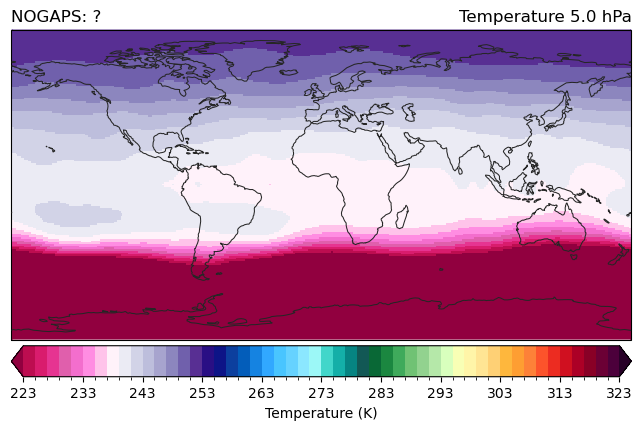

In [10]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[8, 8]).ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.01, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(f"{ds.t.GRIB_name} {ds.isobaricInhPa.item()} hPa", loc="right")
ax.set_title(f"{H.model.upper()}: {H.product_description}", loc="left")